In [19]:
import torch
import os
nodes = [(0, {'pos': (0.1, 0.65)}),
         (1, {'pos': (0.05, 0.05)}), 
         (2, {'pos': (0.2, 0.15)}), 
         (3, {'pos': (0.55, 0.05)}),
         (4, {'pos': (0.8, 0.05)}),
         (5, {'pos': (0.9, 0.1)}),
         (6, {'pos': (0.75, 0.15)}),
         (7, {'pos': (0.5, 0.2)}),
         (8, {'pos': (0.3, 0.3)}),
         (9, {'pos': (0.2, 0.3)}),
         (10, {'pos': (0.3, 0.4)}),
         (11, {'pos': (0.65, 0.35)}),
         (12, {'pos': (0.8, 0.5)}),
         (13, {'pos': (0.5, 0.5)}),
         (14, {'pos': (0.4, 0.65)}),
         (15, {'pos': (0.15, 0.6)}),
         (16, {'pos': (0.3, 0.7)}),
         (17, {'pos': (0.5, 0.7)}),
         (18, {'pos': (0.8, 0.8)}),
         (19, {'pos': (0.4, 0.8)}),
         (20, {'pos': (0.25, 0.85)}),
         (21, {'pos': (0.1, 0.9)}),
         (22, {'pos': (0.2, 0.95)}),
         (23, {'pos': (0.45, 0.9)}),
         (24, {'pos': (0.95, 0.95)}),
         (25, {'pos': (0.9, 0.4)}),
         (26, {'pos': (0.95, 0.05)})]
edges = [(0, 21), (0, 1), (0, 15), (21, 22), (22, 20), (20, 23), (23, 24), (24, 18), (19, 14), (14, 15), (15, 16), (16, 20), (19, 20), (19, 17), (14, 17), (14, 16), (17, 18), (12, 18), (12, 13), (13, 14), (10, 14), (1, 15), (9, 15), (1, 9), (1, 2), (11, 12), (9, 10), (3, 7), (2, 3), (7, 8), (8, 9), (8, 10), (10, 11), (8, 11), (6, 11), (3, 4), (4, 5), (4, 6), (5, 6), (24, 25), (12, 25), (5, 25), (11, 25), (5, 26)]

def visualize_predictions(samples, ground_truth_hist, ground_truth_fut, num_samples=5):
        """
        Visualize the predictions of the model along with ground truth data.

        :param samples: A list of predicted edge indices.
        :param ground_truth_hist: A list of actual history edge indices.
        :param ground_truth_fut: A list of actual future edge indices.
        :param num_samples: Number of samples to visualize.
        """
        import matplotlib.pyplot as plt
        import networkx as nx
        '''save_dir = f'{os.path.join(model_dir, f'{exp_name}', 'plots')}'
        os.makedirs(save_dir, exist_ok=True)'''
        G = nx.Graph()
        G.add_nodes_from(nodes)
        all_edges = {tuple(edges[idx]) for idx in range(len(edges))}
        G.add_edges_from(all_edges)
        
        pos = nx.get_node_attributes(G, 'pos')  # Retrieve node positions stored in node attributes

        for i in range(min(num_samples, len(samples))):
            plt.figure(figsize=(18, 8))            

            for plot_num, (title, edge_indices) in enumerate([
                ('Ground Truth History', ground_truth_hist[i]),
                ('Ground Truth Future', ground_truth_fut[i]),
                ('Predicted Future', samples[i])
            ]):
                plt.subplot(1, 3, plot_num + 1)
                plt.title(title)
                subgraph_edges = {tuple(edges[idx]) for idx in edge_indices if idx < len(edges)}

                # Draw all edges as muted gray
                nx.draw_networkx_edges(G, pos, edgelist=all_edges, width=0.5, alpha=0.3, edge_color='gray')

                # Draw subgraph edges with specified color
                edge_color = 'gray' if plot_num == 0 else 'green' if plot_num == 1 else 'red'
                node_color = 'skyblue'# if plot_num == 0 else 'lightgreen' if plot_num == 1 else 'orange'
                nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=500)
                nx.draw_networkx_edges(G, pos, edgelist=subgraph_edges, width=3, alpha=1.0, edge_color=edge_color)
                nx.draw_networkx_labels(G, pos, font_size=15)
            plt.show()

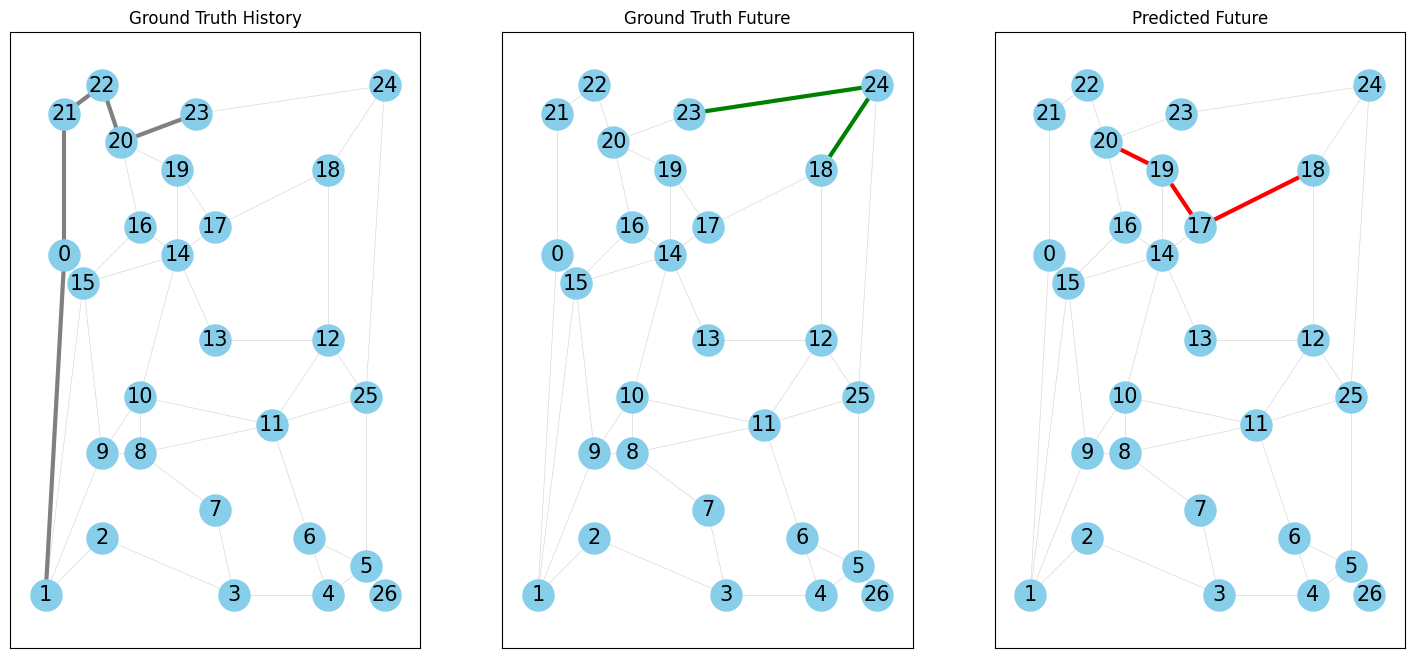

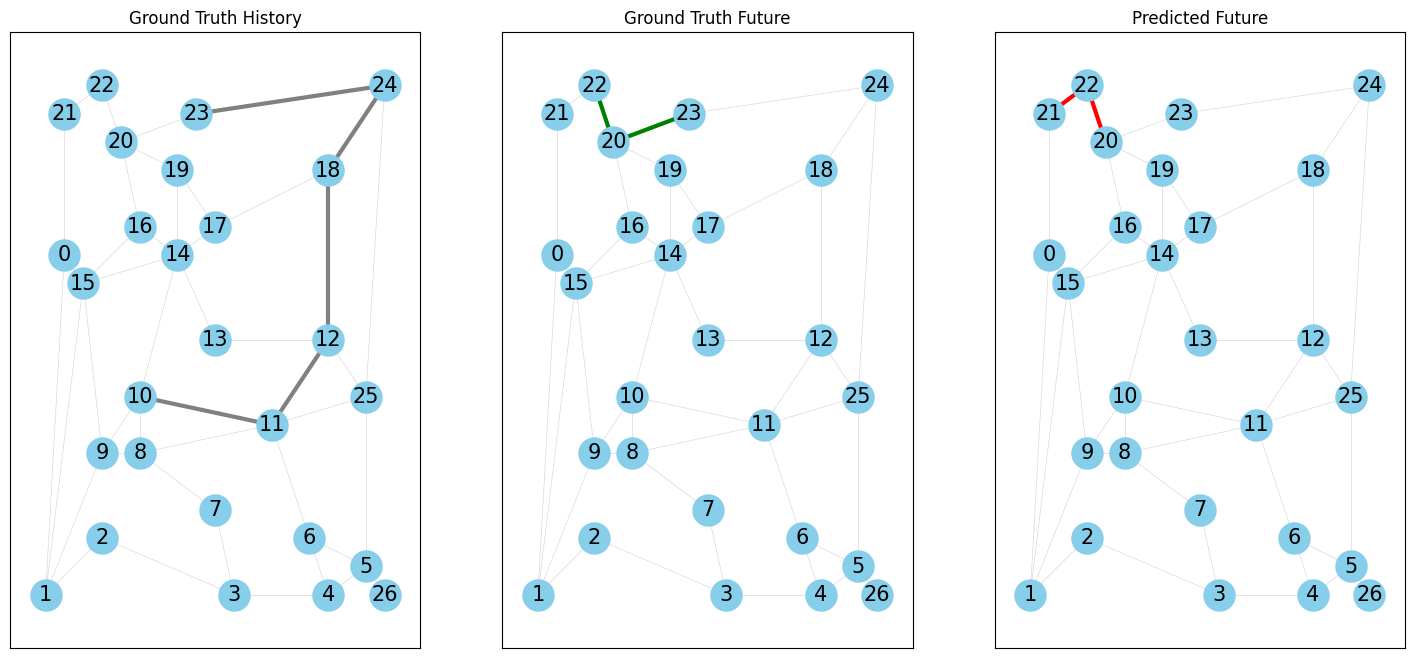

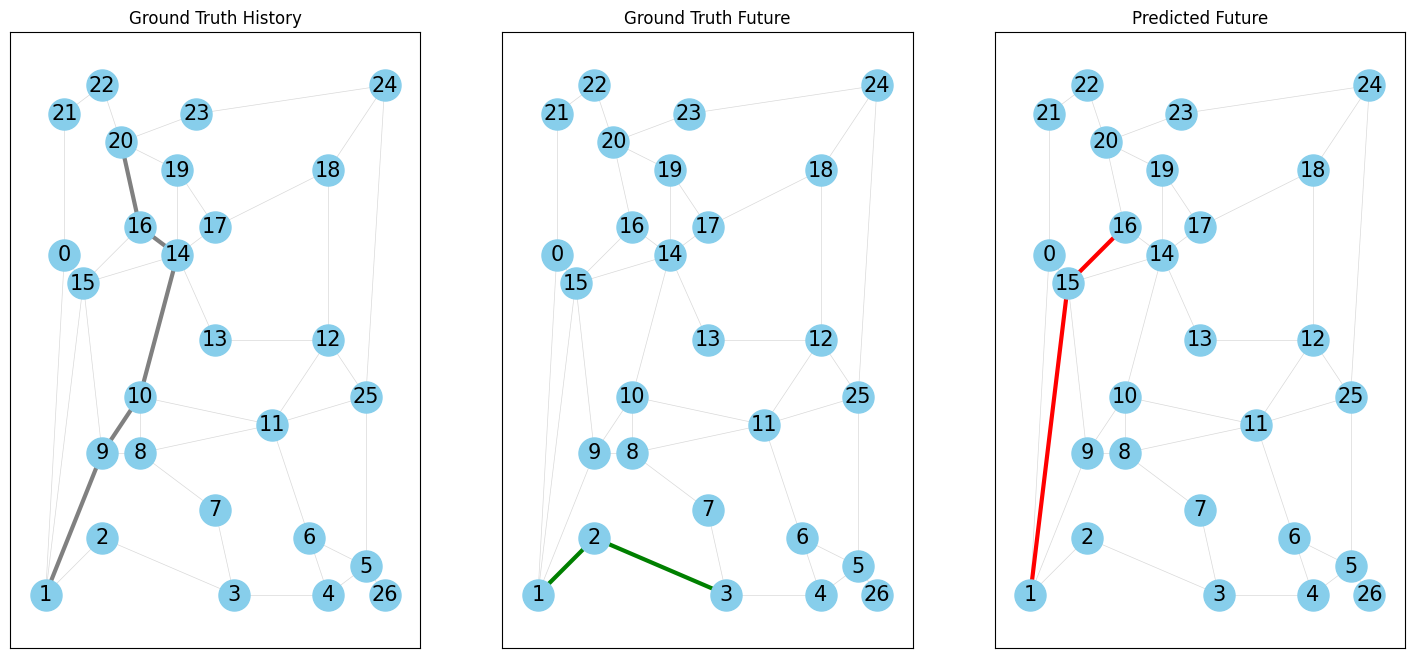

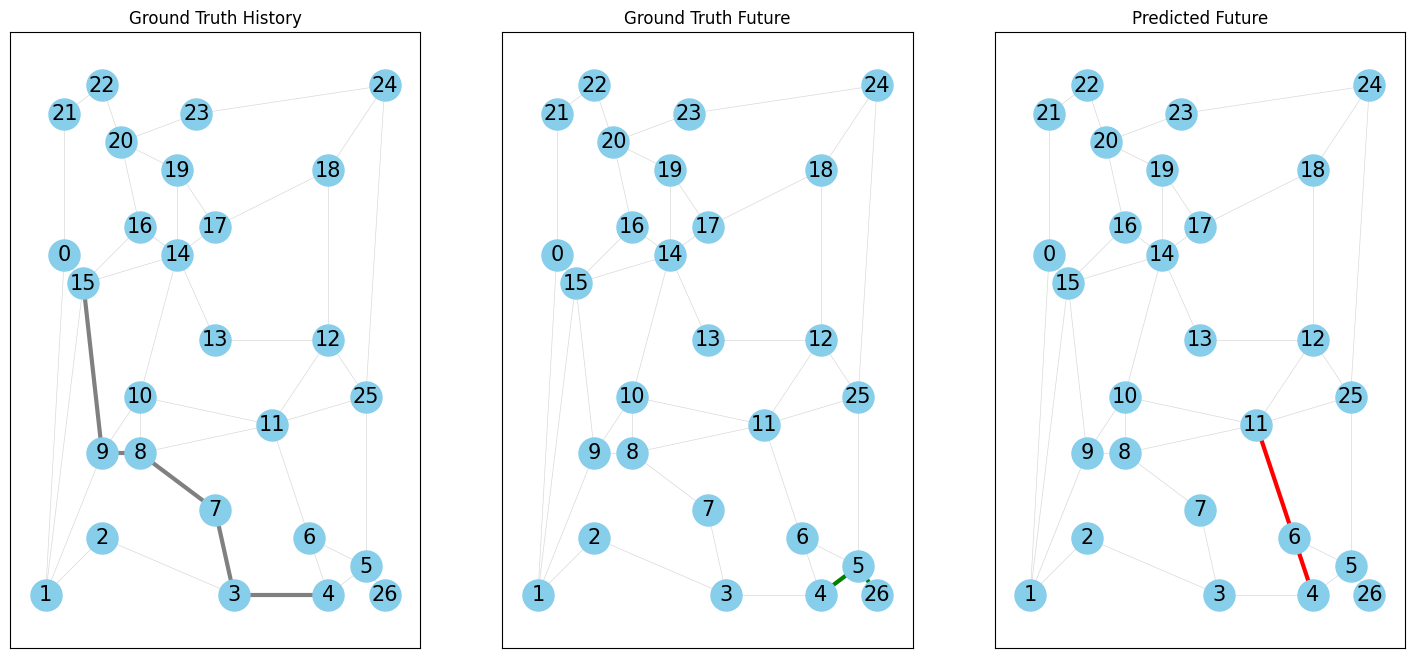

In [20]:
samples = [[12, 13, 16], [4, 3], [21, 10], [37, 34]]
ground_truth_hist = [[1, 0, 3, 4, 5], [32, 25, 17, 7, 6], [11, 15, 20, 26, 23], [22, 30, 29, 27, 35]] 
ground_truth_fut = [[6, 7], [5, 4], [24, 28], [36, 43]]

visualize_predictions(samples, ground_truth_hist, ground_truth_fut, num_samples=5)

In [28]:
import h5py
from tqdm import tqdm
TDRIVE_PATH = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/tdrive.h5'
def load_new_format(new_file_path):
    paths = []

    with h5py.File(new_file_path, 'r') as new_hf:
        node_coordinates = new_hf['graph']['node_coordinates'][:]
        edges = new_hf['graph']['edges'][:]
        
        for i in tqdm(new_hf['trajectories'].keys()):
                path_group = new_hf['trajectories'][i]
                path = {attr: path_group[attr][()] for attr in path_group.keys()}
                if 'edge_orientation' in path:
                    path['edge_orientations'] = path.pop('edge_orientation')
                paths.append(path)
    nodes = [(i, {'pos': tuple(pos)}) for i, pos in enumerate(node_coordinates)]
    
    return paths, nodes, edges

In [29]:
paths, nodes, edges = load_new_format(TDRIVE_PATH)

  0%|          | 0/7218 [00:00<?, ?it/s]

100%|██████████| 7218/7218 [00:13<00:00, 542.96it/s]


In [31]:
edges

array([[   0, 6154],
       [   0, 8268],
       [   0, 3616],
       ...,
       [9737, 9751],
       [9747, 9805],
       [9759, 9809]])

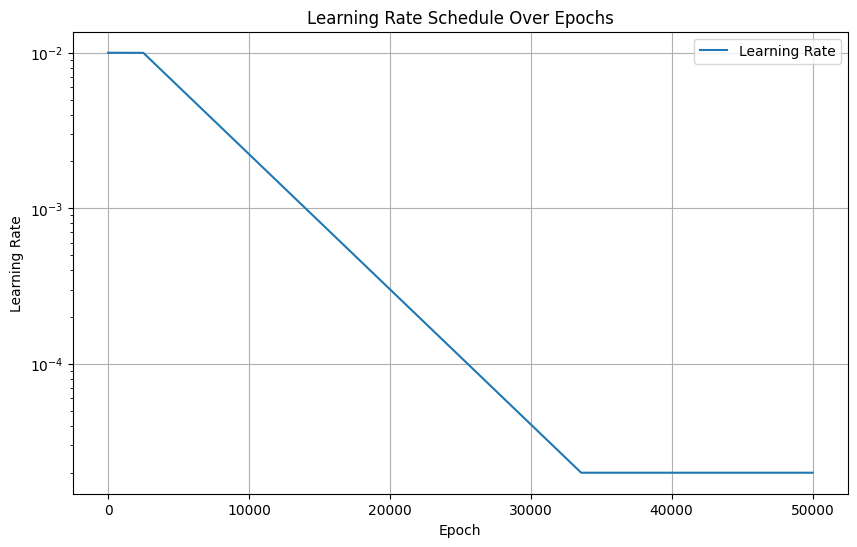

In [6]:
import matplotlib.pyplot as plt

# Parameters
lr = 0.01
num_epochs = 50000
learning_rate_warmup_steps = 2500
lr_decay_parameter = 0.9998

# Learning rate schedule
def lr_lambda(epoch):
    if epoch < learning_rate_warmup_steps:
        return 1.0
    else:
        decay_lr = lr_decay_parameter ** (epoch - learning_rate_warmup_steps)
        return max(decay_lr, 2e-5 / lr)


# Calculate learning rates for each epoch
learning_rates = [lr * lr_lambda(epoch) for epoch in range(num_epochs)]

# Plot the learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')#
plt.yscale('log')
plt.title('Learning Rate Schedule Over Epochs')
plt.legend()
plt.grid(True)
plt.show()